In [34]:
#Importamos las librerias necesarias
import random

import pandas as pd


In [36]:
#Inicializamos las variables
hostnames=[]
dataset = []
df = None

In [40]:
#Creamos una funcion para generar los hostnames en base a las siguientes reglas
def set_hostnames(number_of_hosts: int) -> None:
    os = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1   #40% Linux | 30% Solaris | 20% AIX | 10% HP-UX
    enviroment = ['D']*int(number_of_hosts * 0.10) + ['I']*int(number_of_hosts * 0.10) + ['T']*int(number_of_hosts * 0.25) + ['S']*int(number_of_hosts * 0.25) + ['P']*int(number_of_hosts * 0.30)   #10% Development | 10% Integration | 25% Testing | 25% Staging | 30% Production
    country = ['NOR']*int(number_of_hosts * 0.06) + ['FRA']*int(number_of_hosts * 0.09) + ['ITA']*int(number_of_hosts * 0.16) + ['ESP']*int(number_of_hosts * 0.16) + ['DEU']*int(number_of_hosts * 0.23) + ['IRL']*int(number_of_hosts * 0.30)  #6% Norway | 9% France | 16% Italy |16% Spain | 23% Germany | 30% Ireland
    num_nodo = []

    for i in range(number_of_hosts):
        selected_country = random.choice(country)
        host = random.choice(os) + random.choice(enviroment) 
        host+= selected_country
        num_nodo.append(host)
        host += str(num_nodo.count(host)).zfill(3)
        hostnames.append(host)


In [42]:
#Creamos la funcion para obtener el nombre del SO
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknow'

In [44]:
#Creamos la funcion para obtener el nombre del entorno
def get_enviroment(hostname: str) -> str:
    if hostname[1]== 'D':
        return 'Development'
    elif hostname[1]== 'I':
        return 'Integration'
    elif hostname[1]== 'T':
        return 'Testing'
    elif hostname[1]== 'S':
        return 'Staging'
    elif hostname[1]== 'P':
        return 'Production'
    else:
        return 'Unknow'

In [46]:
#Creamos la funcion para obtener el nombre del pais
def get_country(hostname: str) -> str:
    if hostname[2:5]== 'NOR':
        return 'Norway'
    elif hostname[2:5]== 'DEU':
        return 'Germany'
    elif hostname[2:5]== 'ITA':
        return 'Italy'
    elif hostname[2:5]== 'ESP':
        return 'Spain'
    elif hostname[2:5]== 'IRL':
        return 'Ireland'
    elif hostname[2:5]== 'FRA':
        return 'France'
    else:
        return 'Unknow'

In [48]:
#Creamos la funcion para generar el DataFrame
def set_dataframe (count: int) -> None:
    global df

    set_hostnames(count)

    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os':get_os(hostname),
            'enviroment':get_enviroment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })

    df = pd.DataFrame(dataset)
                   

In [50]:
#Creamos el DataFrame
set_dataframe(1500)

In [52]:
df

,hostname,os,enviroment,country,node
0,SSFRA001,Solaris,Staging,France,1
1,STESP001,Solaris,Testing,Spain,1
2,AIIRL001,AIX,Integration,Ireland,1
3,SSITA001,Solaris,Staging,Italy,1
4,ATIRL001,AIX,Testing,Ireland,1
...,...,...,...,...,...
1495,LTITA022,Linux,Testing,Italy,22
1496,LSIRL055,Linux,Staging,Ireland,55
1497,ADDEU004,AIX,Development,Germany,4
1498,LTESP029,Linux,Testing,Spain,29


In [54]:
#Guardamos el DataFrame en un fichero CSV
df.to_csv ('hosts.csv', header=True, index= False)

hosts_df =pd.read_csv('hosts.csv', index_col=None,encoding='ISO-8859-1')

hosts_df

,hostname,os,enviroment,country,node
0,SSFRA001,Solaris,Staging,France,1
1,STESP001,Solaris,Testing,Spain,1
2,AIIRL001,AIX,Integration,Ireland,1
3,SSITA001,Solaris,Staging,Italy,1
4,ATIRL001,AIX,Testing,Ireland,1
...,...,...,...,...,...
1495,LTITA022,Linux,Testing,Italy,22
1496,LSIRL055,Linux,Staging,Ireland,55
1497,ADDEU004,AIX,Development,Germany,4
1498,LTESP029,Linux,Testing,Spain,29


In [56]:
#Generamos un grafico de barras, agrupando para cada pais los entornos
h = hosts_df

h_grafic = h.groupby (['country', 'enviroment']).size()

h_grafic

country  enviroment 
France   Development     11
         Integration     11
         Production      36
         Staging         34
         Testing         34
Germany  Development     47
         Integration     30
         Production     118
         Staging         92
         Testing         71
Ireland  Development     44
         Integration     44
         Production     133
         Staging        114
         Testing        109
Italy    Development     24
         Integration     26
         Production      72
         Staging         70
         Testing         52
Norway   Development      5
         Integration      7
         Production      32
         Staging         25
         Testing         25
Spain    Development     22
         Integration     23
         Production      69
         Staging         53
         Testing         67
dtype: int64

In [58]:
h_grafic.unstack()

enviroment,Development,Integration,Production,Staging,Testing
country,,,,,
France,11,11,36,34,34
Germany,47,30,118,92,71
Ireland,44,44,133,114,109
Italy,24,26,72,70,52
Norway,5,7,32,25,25
Spain,22,23,69,53,67


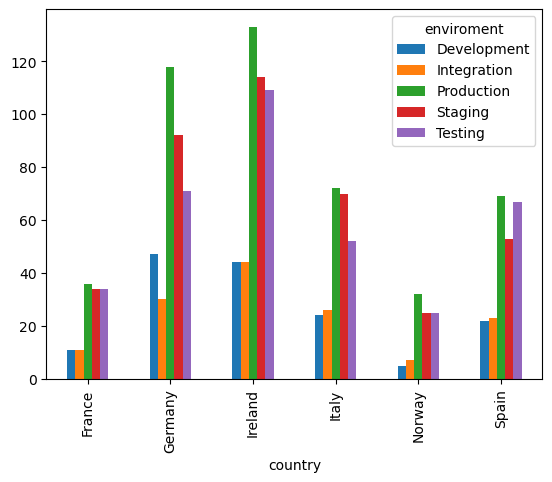

In [60]:
#Importamos las librerias necesarias y generamos el grafico de barras verticales

import matplotlib.pyplot as plt

h_grafic.unstack().plot(kind='bar')
plt.show()

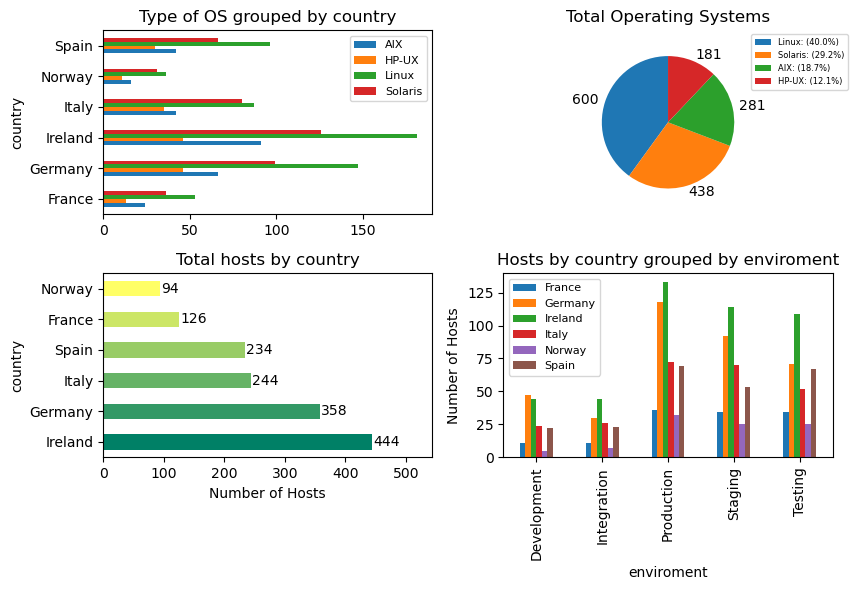

In [80]:
#Generamos una figura con 4 graficos en una malla de 2 filas y 2 columnas

import seaborn as sns
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(9,6))
number_of_hosts=random.randint(1,500)

#Grafico 0,0
grouped_data = df.groupby (['country', 'os']).size().unstack(fill_value=0)
grouped_data.plot(kind='barh', ax=axs[0,0])
axs[0,0].set_title ('Type of OS grouped by country')
axs[0, 0].legend (loc='upper right', prop={'size': 8})


#Grafico 0,1
grouped_data_pie =df['os'].value_counts()
total_count = grouped_data_pie.sum()

grouped_data_pie.plot(kind='pie', ax=axs[0,1], title='Total Operating Systems',startangle=90, fontsize=10, radius=0.9)

for i, (os, count) in enumerate(zip(grouped_data_pie.index, grouped_data_pie)):
    axs[0, 1].texts[i].set_text(f'{count}')

axs[0, 1].legend([f'{os}: ({(count / total_count) * 100:.1f}%)' for os, count in zip(grouped_data_pie.index, grouped_data_pie)], loc='upper right', bbox_to_anchor=(1.5, 1), prop={'size': 6})
axs[0, 1].set_ylabel('')



#Grafico 1,0
hosts_by_country = df['country'].value_counts()
axs[1,0].set_xlim(0, hosts_by_country.max() + 100)

color_gradient=plt.cm.summer(np.linspace(0,1 ,len(hosts_by_country)))
hosts_by_country.plot(kind='barh', ax=axs[1,0],color=color_gradient)

for index, value in enumerate(hosts_by_country):
    axs[1, 0].text(value + 2, index, str(value), va='center')
    
axs[1,0].set_title ('Total hosts by country')
axs[1, 0].set_xlabel('Number of Hosts')




#Grafico 1,1
grouped_data = df.groupby (['enviroment','country']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', ax=axs[1,1])
axs[1,1].set_title ('Hosts by country grouped by enviroment')
axs[1, 1].legend (loc='upper left', prop={'size': 8})
axs[1, 1].set_ylabel('Number of Hosts')



plt.tight_layout()
plt.show()

fig.tight_layout()